In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize

## Parabolic minimization 

Parabolic minimization makes an approximation of the function as a parabola, based on three points, and steps to the minimum of that function.

In [2]:
def parabolic_step(func=None, a=None, b=None, c=None):
    """returns the minimum of the function as approximated by a parabola"""
    fa = func(a)
    fb = func(b)
    fc = func(c)
    denom = (b - a) * (fb - fc) - (b -c) * (fb - fa)
    numer = (b - a)**2 * (fb - fc) - (b -c)**2 * (fb - fa)
    # If singular, just return b 
    if(np.abs(denom) < 1.e-15):
        x = b
    else:
        x = b - 0.5 * numer / denom
    return(x)

Let us try this on a parabola.

In [3]:
def func_parabola(x):
    return((x-1.1)**2)

<IPython.core.display.Javascript object>


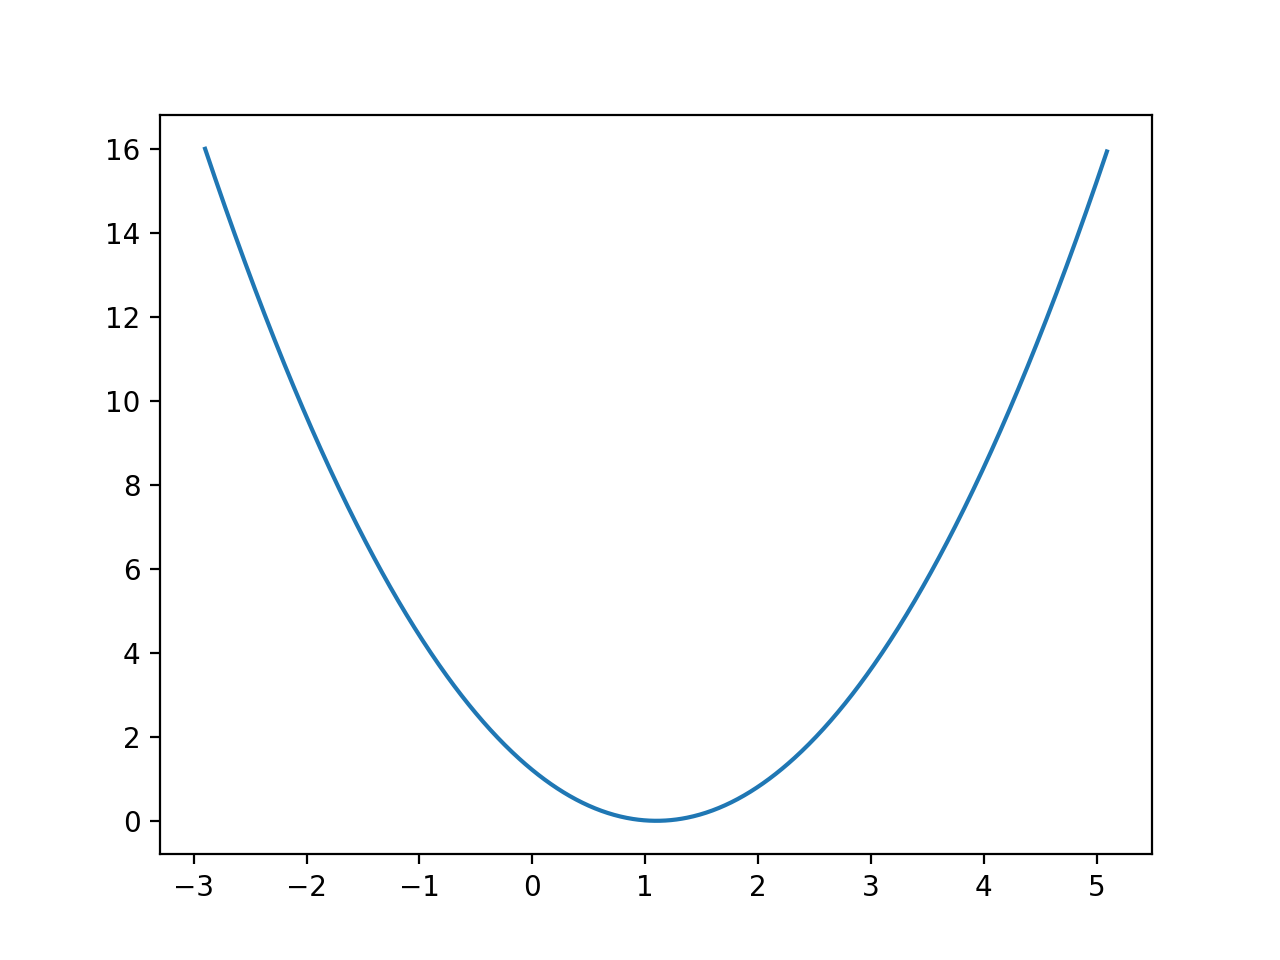

In [4]:
xgrid = -4. + 8. * np.arange(1000) / 1000. + 1.1
plt.plot(xgrid, func_parabola(xgrid))

In [5]:
a = 2. 
b = 3.
c = 4.
print(parabolic_step(func=func_parabola, a=a, b=b, c=c))

1.1000000000000008


Now let's try iterating this on a non-parabolic function, which is nevertheless convex.

In [15]:
def parabolic_minimize(func=None, astart=None, bstart=None, cstart=None,
                       tol=1.e-5, maxiter=10000):
    xgrid = -12. + 25. * np.arange(10000) / 10000. 
    plt.plot(xgrid, func(xgrid))
    a = astart
    b = bstart
    c = cstart
    bold = b + 2. * tol
    niter = 0
    while((np.abs(bold - b) > tol) & (niter < maxiter)):
        bold = b
        b = parabolic_step(func=func, a=a, b=b, c=c)
        if(b < bold):
            c = bold
        else:
            a = bold
        step = np.array([bold, b])
        plt.plot(step, func_test(step), color='black')
        plt.plot(step, func_test(step), '.', color='black')
        niter = niter + 1
    return(b)

In [16]:
def func_test(x):
    dx = x - 0.6
    return(0.1 * dx**4 - 0.5 * dx**3 + dx**2 + 2. * dx)

<IPython.core.display.Javascript object>


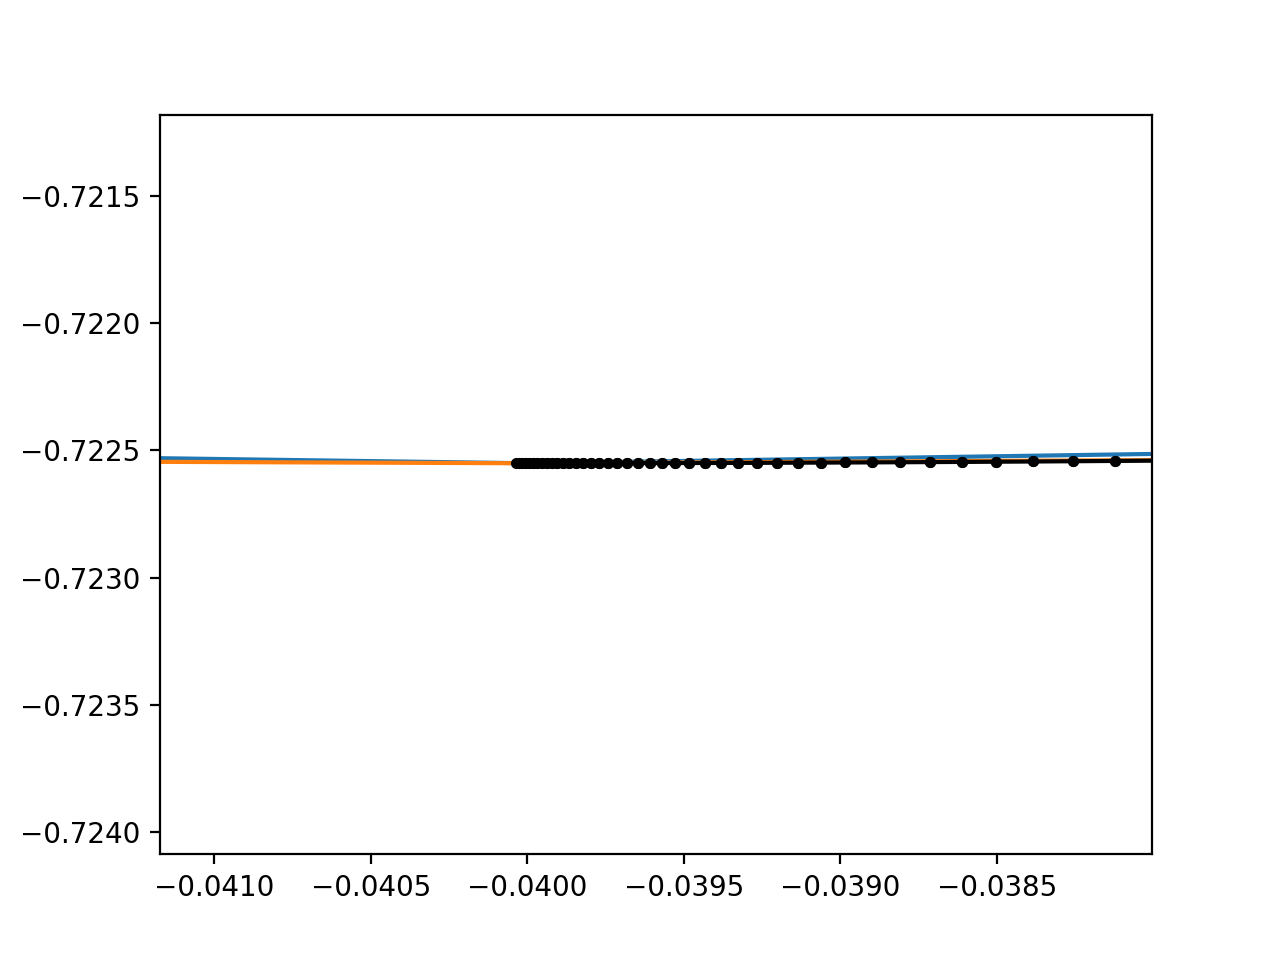

In [17]:
xgrid = -4. + 8. * np.arange(1000) / 1000. 
plt.plot(xgrid, func_test(xgrid))

In [18]:
parabolic_minimize(func=func_test, astart=1., bstart=2., cstart=3.)

-0.04003502515313969

## Bisection method

In [31]:
jd_cross = optimize.bisect(moon_alt, jd_xmas, jd_next)
print(jd_cross)
print(moon_alt(jd_cross))

2455555.5673411433
[ -1.35120087e-07]


<IPython.core.display.Javascript object>


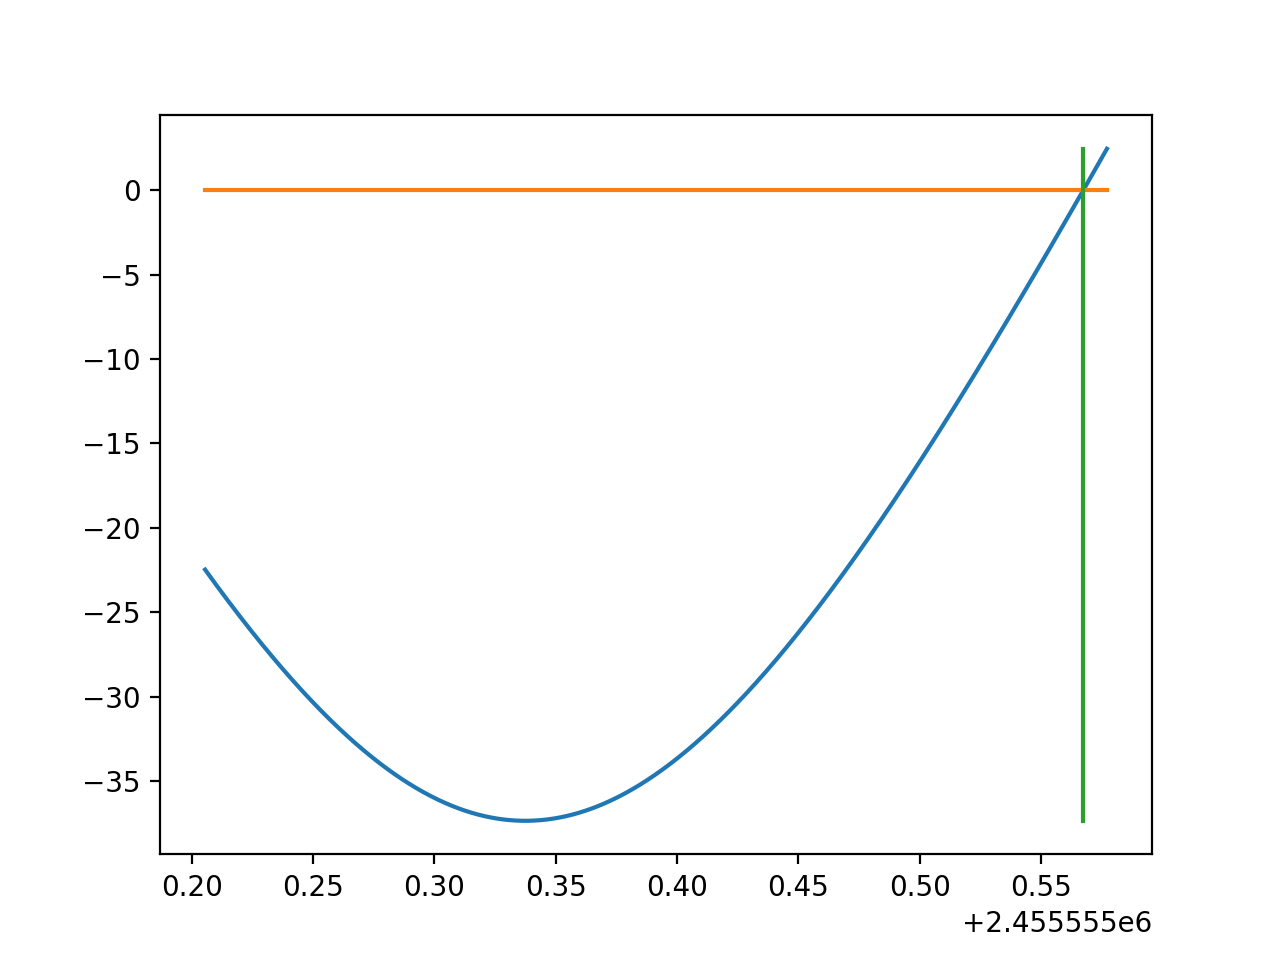

In [32]:
jds = jd_xmas + (jd_next - jd_xmas) * np.arange(1000) / 999.
alts = moon_alt(jds)
plt.plot(jds, alts)
plt.plot([jd_xmas, jd_next], [0, 0])
plt.plot([jd_cross, jd_cross], [alts.min(), alts.max()])

## Brent's Method (faster)

In [8]:
jd_cross = optimize.brentq(moon_alt, jd_xmas, jd_next)
print(jd_cross)
print(moon_alt(jd_cross))

2455555.5673411437
[ -1.82338894e-08]


## Newton-Raphson

Newton-Raphson is can't be applied to the case above, because we don't have access to the derivatives of the function. Here we will just test a simple function.

In [33]:
def func(x):
    return(0.8*(x - 0.2)**3 + 2. * (x-0.2)**2 + (x-0.2) + 0.4)

def dfunc(x):
    return(3. * 0.8*(x - 0.2)**2 + 2. * 2. * (x-0.2) + 1.)

<IPython.core.display.Javascript object>


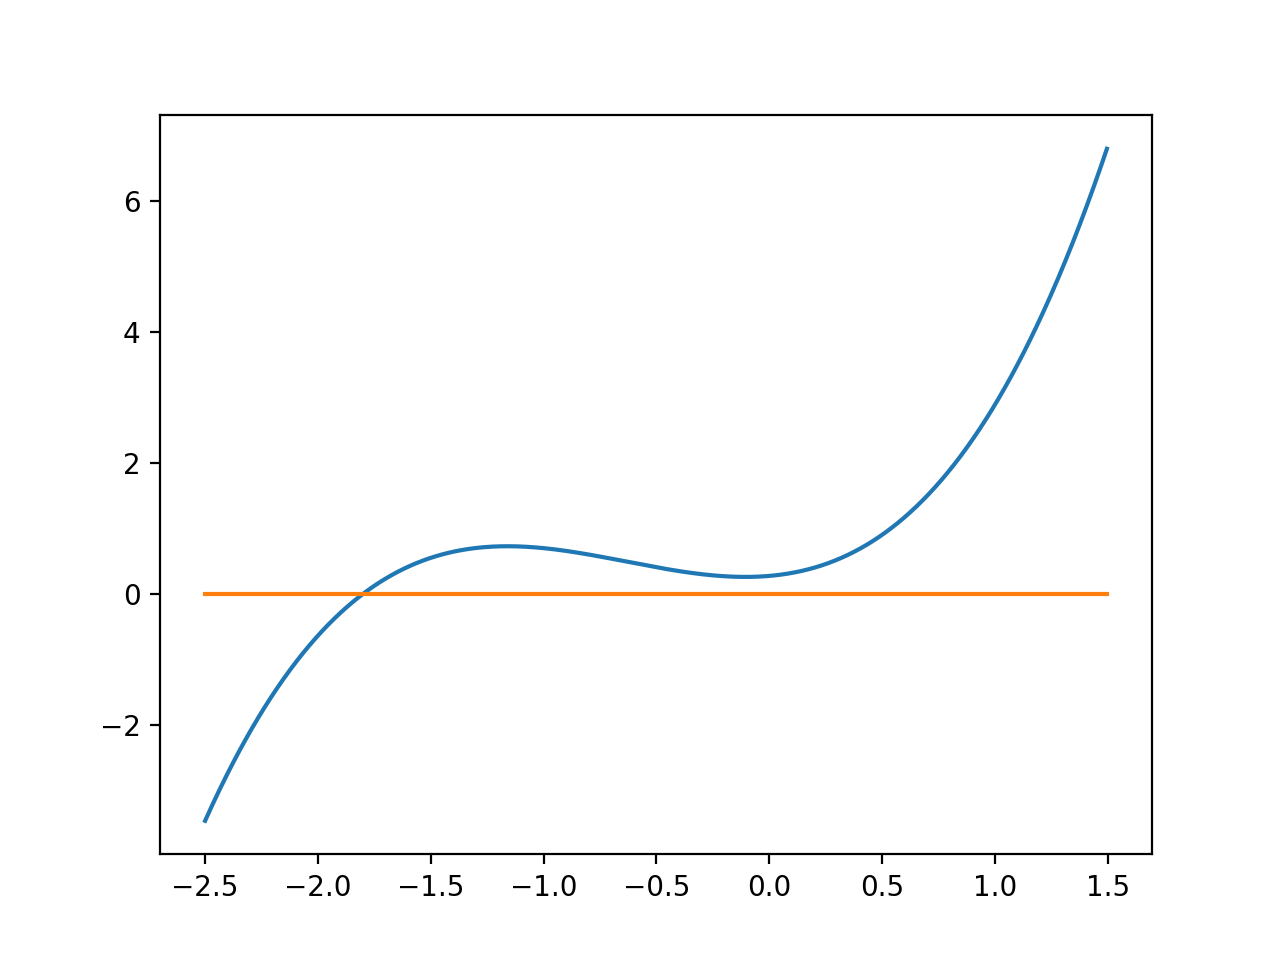

In [34]:
xgrid = 4. * (np.arange(1000) / 1000. - 0.5) - 0.5 
plt.plot(xgrid, func(xgrid))
plt.plot(xgrid, 0. * func(xgrid))

In [35]:
def newton_raphson(xst=0.):
    tol = 1.e-10
    maxiter = 10
    x = xst
    plt.plot(xgrid, func(xgrid))
    plt.plot(xgrid, 0. * func(xgrid))
    for i in np.arange(maxiter):
        delta = - func(x) / dfunc(x)
        plt.plot([x, x + delta], [func(x), 0.], color='black')
        plt.plot([x + delta, x + delta], [0., func(x + delta)], color='black')
        x = x + delta
        if(np.abs(delta) < tol):
            return(x)

It works great if you are somewhere near the root!

<IPython.core.display.Javascript object>


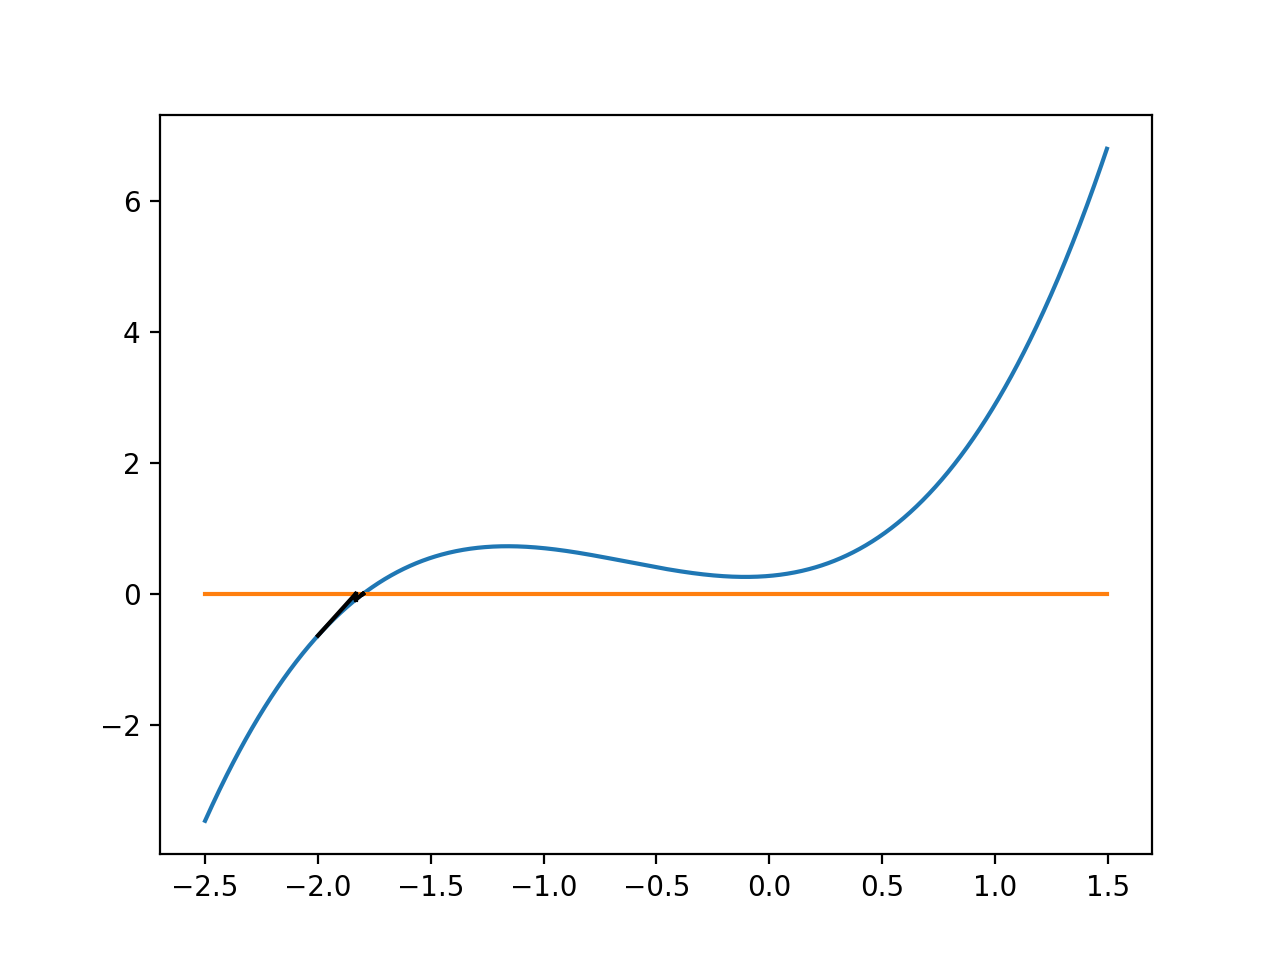

-1.7999999999999998


In [36]:
print(newton_raphson(xst=-2.))

But it is not a naturally bracketing method. So it can get lost.

<IPython.core.display.Javascript object>


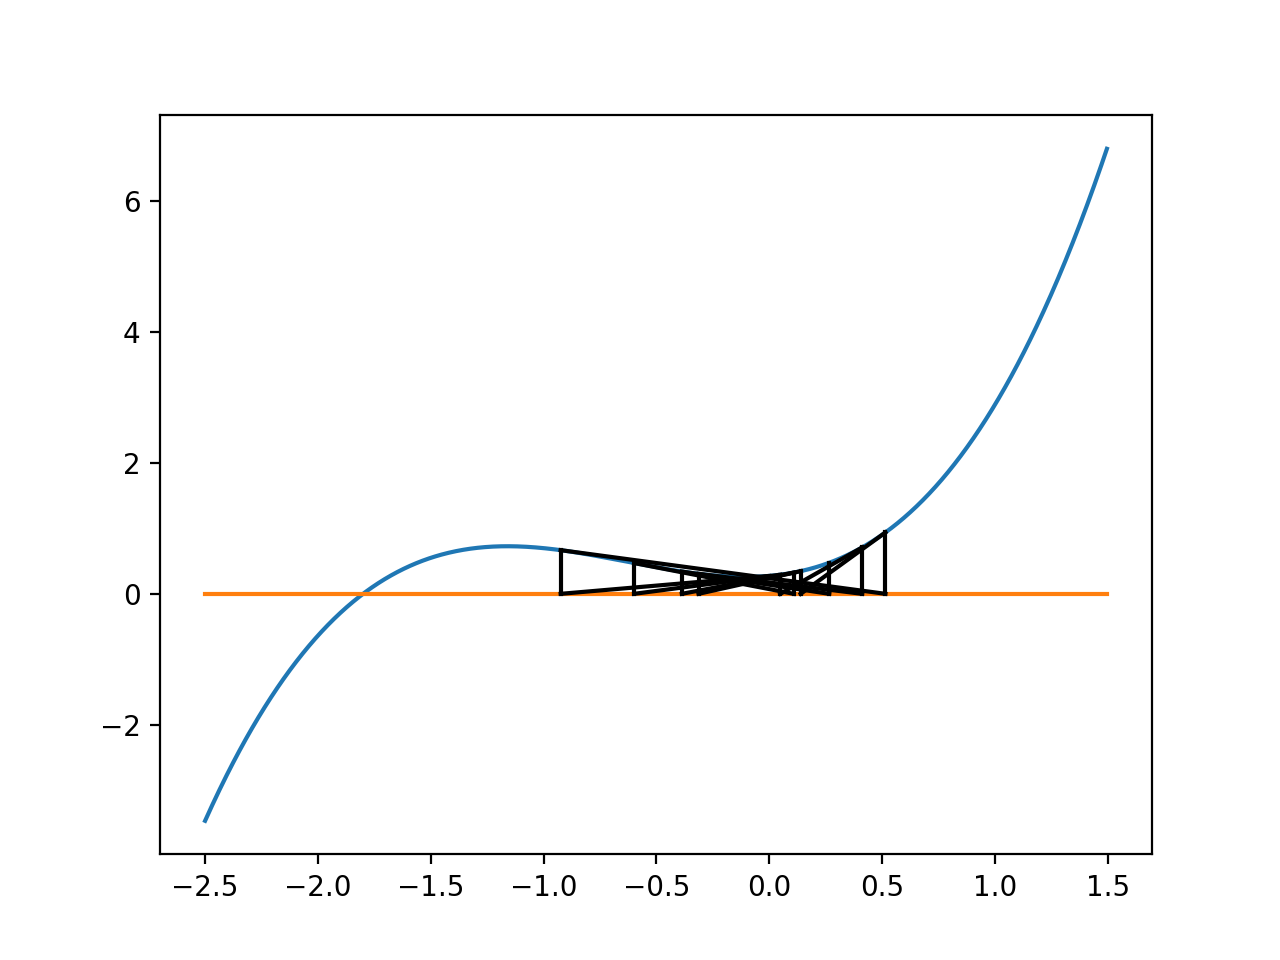

None


In [37]:
print(newton_raphson(xst=0))

<IPython.core.display.Javascript object>


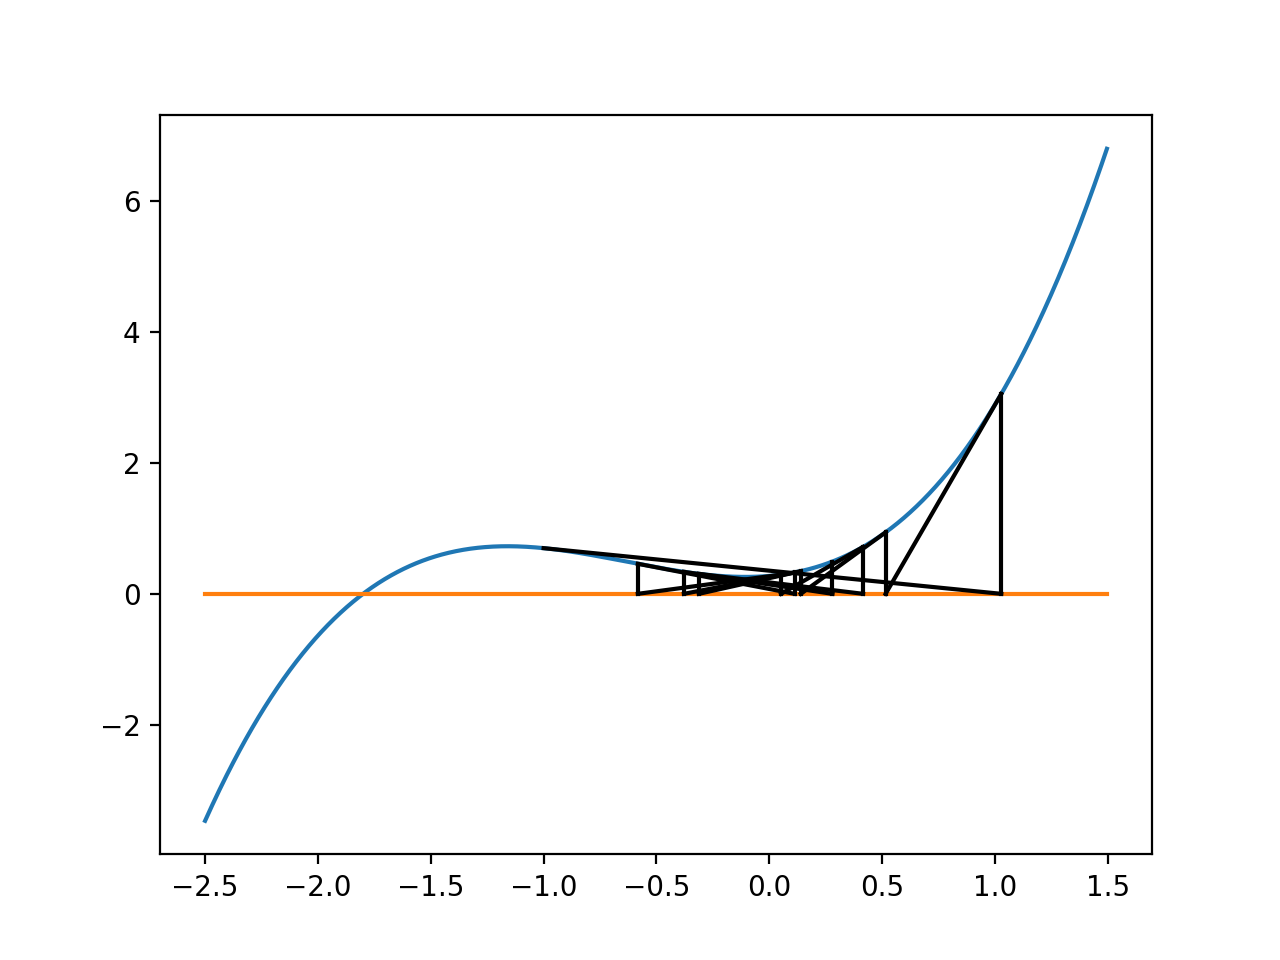

None


In [38]:
print(newton_raphson(xst=-1.))

This isn't just a function of my code. This is the behavior of the standard Newton-Raphson implementations.

In [42]:
print(optimize.newton(func, -2., fprime=dfunc))

-1.7999999999999998


In [43]:
print(optimize.newton(func, 0., fprime=dfunc))

RuntimeError: Failed to converge after 50 iterations, value is -1.5361778366612209

This same function can be dealt with using a bracketing method followed by Brent.

In [50]:
def bracket(func):
    a = 0.
    b = 1.
    maxab = 1.e+7
    while(b - a < maxab):
        d = b - a
        a = a - 0.1 * d
        b = b + 0.1 * d
        if(func(a) * func(b) < 0.):
            return(a, b)
    return(a, b)

(a, b) = bracket(func)
z = optimize.brentq(func, a, c)

In [51]:
print(z)

-1.7999999999999998
